In [1]:
import pandas as pd
import numpy as np
import os, sys
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import seaborn as sns

os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)

# Load the .txt file
# Construct the file path
train_path = os.path.join(rpath, 'data', 'daily_resampled_data.csv')
processed_data = pd.read_csv(train_path)  # Tab-delimited

processed_data.head()

,Date,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Sales
0,2013-01-01,2,0,0,1,1,5395.170557,97235
1,2013-01-02,3,1,0,0,1,5390.358744,6949829
2,2013-01-03,4,1,0,0,1,5390.358744,6347820
3,2013-01-04,5,1,0,0,1,5390.358744,6638954
4,2013-01-05,6,1,0,0,1,5390.358744,5951593


In [2]:
processed_data.isnull().sum()

Date                   0
DayOfWeek              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
CompetitionDistance    0
Sales                  0
dtype: int64

**Univarite single step**

In [ ]:
# univariate convlstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    end_ix = i + n_steps
    if end_ix > len(sequence)-1:
      break
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)


In [ ]:
data=daily_sales.squeeze()
data_train = daily_sales[:754].squeeze()
data_test  = daily_sales[754:].squeeze()

from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler(feature_range=(-1,1))
train_data=scaler.fit_transform(np.array(data_train).reshape(-1,1))
test_data=scaler.transform(np.array(data_test).reshape(-1,1))
#print(df_train)

In [ ]:
n_steps = 21
# split into samples
X_test, y_test = split_sequence(test_data, n_steps)
X_train, y_train = split_sequence(train_data, n_steps)

In [ ]:
n_features = 1
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for predicting sales

# Compile your LSTM model with Huber loss
model.compile(loss='huber', optimizer='adam')

# Train the model
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import keras
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# fit model

# Train the model
history=model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=1,callbacks=[stop_early])

Epoch 1/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0963 - val_loss: 0.0736
Epoch 2/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0867 - val_loss: 0.0750
Epoch 3/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0795 - val_loss: 0.0728
Epoch 4/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0808 - val_loss: 0.0725
Epoch 5/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0811 - val_loss: 0.0743
Epoch 6/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0707 - val_loss: 0.0755
Epoch 7/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0724 - val_loss: 0.0758
Epoch 8/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0717 - val_loss: 0.0748
Epoch 9/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0675 - val_loss: 0.0766


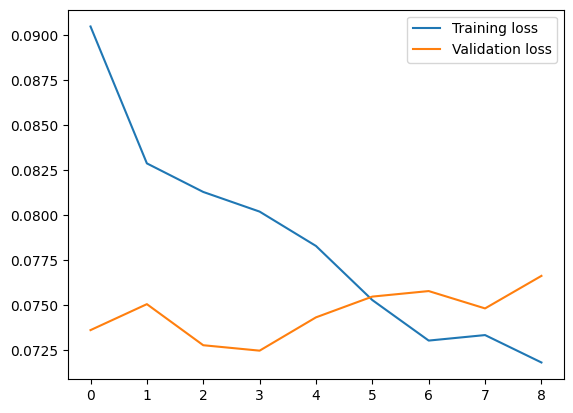

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error

test_predict = model.predict(X_test)
### y data performance metrics
mae = mean_absolute_error(y_test,test_predict)
mse = mean_squared_error(y_test,test_predict)
r2 = r2_score(y_test,test_predict)
rmse = math.sqrt(mean_squared_error(y_test,test_predict))
print("The model performance for ying set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 is {}'.format(r2))
print('RMSE is {}'.format(rmse))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
The model performance for ying set:
--------------------------------------

MAE is 0.28720603225801977
MSE is 0.14954728664833597
R2 is 0.162051135735508
RMSE is 0.38671344254930673


**Multivarite single step**

In [ ]:
import pandas as pd

# Assuming your data is in a DataFrame called merged_train_data

# Define the aggregation rules for each column
aggregation_rules = {
    'Store': 'first',  # Keep the first value (or you can choose 'mean' if necessary)
    'DayOfWeek': lambda x: x.mode()[0],  # Keep the first value (or you can choose 'mode' if preferred)
    'Customers': 'sum',  # Sum of customers per day
    'Open': 'first',  # Keep the first value or you can use 'max' to check if it was open during any time of the day
    'Promo': 'max',  # If any Promo is running, it will reflect
    'StateHoliday': lambda x: x.mode()[0],  # Keep the first value (or use mode if preferred)
    'SchoolHoliday': 'max',  # Check if any SchoolHoliday happened that day
    'StoreType': lambda x: x.mode()[0],  # Use first or mode
    'Assortment': lambda x: x.mode()[0],  # Use first or mode
    'CompetitionDistance': 'mean',  # Take the average competition distance for the day
    'CompetitionOpenSinceMonth': 'first',  # Use first (or you can take median)
    'CompetitionOpenSinceYear': 'first',  # Use first (or you can take median)
    'Promo2': 'max',  # If Promo2 was running on any time during the day
    'Promo2SinceWeek': 'first',  # Use first value
    'Promo2SinceYear': 'first',  # Use first value
    'Sales': 'sum',  # Sum of sales per day
}

# Group by 'year', 'month', and 'day' to aggregate on a daily basis
daily_data = merged_train_data.groupby(['Date','year', 'month', 'day']).agg(aggregation_rules).reset_index()

# View the aggregated daily data
daily_data.head()


,Date,year,month,day,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Sales
0,2013-01-01,2013,1,1,1,2,19491,0,0,a,1,a,a,5409.793767,9.0,2008.0,1,23.269093,2011.752774,97235
1,2013-01-02,2013,1,2,1,3,834075,1,0,0,1,a,a,5404.968840,9.0,2008.0,1,23.269093,2011.752774,6949829
2,2013-01-03,2013,1,3,1,4,761040,1,0,0,1,a,a,5404.968840,9.0,2008.0,1,23.269093,2011.752774,6347820
3,2013-01-04,2013,1,4,1,5,782137,1,0,0,1,a,a,5404.968840,9.0,2008.0,1,23.269093,2011.752774,6638954
4,2013-01-05,2013,1,5,1,6,687472,1,0,0,1,a,a,5404.968840,9.0,2008.0,1,23.269093,2011.752774,5951593


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()
daily_resampled_data = daily_data.copy()

daily_resampled_data['StateHoliday'] = daily_resampled_data['StateHoliday'].astype(str)
daily_resampled_data['StoreType'] = daily_resampled_data['StoreType'].astype(str)
daily_resampled_data['Assortment'] = daily_resampled_data['Assortment'].astype(str)

# Apply label encoding to ordinal categorical columns
daily_resampled_data['StoreType'] = label_encoder.fit_transform(daily_resampled_data['StoreType'])
daily_resampled_data['Assortment'] = label_encoder.fit_transform(daily_resampled_data['Assortment'])
daily_resampled_data['StateHoliday'] = label_encoder.fit_transform(daily_resampled_data['StateHoliday'])

daily_resampled_data.head()

,Date,year,month,day,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Sales
0,2013-01-01,2013,1,1,1,2,19491,0,0,1,1,0,0,5409.793767,9.0,2008.0,1,23.269093,2011.752774,97235
1,2013-01-02,2013,1,2,1,3,834075,1,0,0,1,0,0,5404.968840,9.0,2008.0,1,23.269093,2011.752774,6949829
2,2013-01-03,2013,1,3,1,4,761040,1,0,0,1,0,0,5404.968840,9.0,2008.0,1,23.269093,2011.752774,6347820
3,2013-01-04,2013,1,4,1,5,782137,1,0,0,1,0,0,5404.968840,9.0,2008.0,1,23.269093,2011.752774,6638954
4,2013-01-05,2013,1,5,1,6,687472,1,0,0,1,0,0,5404.968840,9.0,2008.0,1,23.269093,2011.752774,5951593


In [ ]:
daily_resampled_data = daily_resampled_data[['Date','DayOfWeek','Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
                                             'CompetitionDistance',  'Sales']]

daily_resampled_data = daily_resampled_data.set_index('Date')
daily_resampled_data.head()

,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Sales
Date,,,,,,,
2013-01-01,2,0,0,1,1,5409.793767,97235
2013-01-02,3,1,0,0,1,5404.968840,6949829
2013-01-03,4,1,0,0,1,5404.968840,6347820
2013-01-04,5,1,0,0,1,5404.968840,6638954
2013-01-05,6,1,0,0,1,5404.968840,5951593


In [ ]:
# Split data into train-val-test
# ==============================================================================
# end_train = '2010-12-02'
n_train_weeks = 754
data_train = daily_resampled_data[:n_train_weeks]
data_test = daily_resampled_data[n_train_weeks:]

print(
    f"Train dates : {data_train.index.min()} --- {data_train.index.max()}   "
    f"(n={len(data_train)})"
)
print(
    f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}   "
    f"(n={len(data_test)})"
)

Train dates : 2013-01-01 00:00:00 --- 2015-01-24 00:00:00   (n=754)
Test dates  : 2015-01-25 00:00:00 --- 2015-07-31 00:00:00   (n=188)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(-1, 1))
train_data=scaler.fit_transform(np.array(data_train))
test_data=scaler.fit_transform(np.array(data_test))
#print(df_train)

In [ ]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
# multivariate data preparation
from numpy import array
from numpy import hstack

in_seq1 = np.array(train_data[:,0])
in_seq2 = np.array(train_data[:,1])
in_seq3 = np.array(train_data[:,2])
in_seq4 = np.array(train_data[:,3])
in_seq5 = np.array(train_data[:,4])
in_seq6 = np.array(train_data[:,5])
out_seq = np.array(train_data[:,6])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
train_dataset = hstack((in_seq1, in_seq2, in_seq3,in_seq4, in_seq5, in_seq6,out_seq))

In [ ]:
# multivariate data preparation
from numpy import array
from numpy import hstack

in_seq1 = np.array(test_data[:,0])
in_seq2 = np.array(test_data[:,1])
in_seq3 = np.array(test_data[:,2])
in_seq4 = np.array(test_data[:,3])
in_seq5 = np.array(test_data[:,4])
in_seq6 = np.array(test_data[:,5])
out_seq = np.array(test_data[:,6])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
test_dataset = hstack((in_seq1, in_seq2, in_seq3,in_seq4, in_seq5, in_seq6,out_seq))

In [ ]:
n_steps_in, n_steps_out = 21, 1
# convert into input/output
X_train, y_train = split_sequences(train_dataset, n_steps_in, n_steps_out)
X_test, y_test = split_sequences(test_dataset, n_steps_in, n_steps_out)

In [ ]:
print(X_train.shape), print(y_train.shape),print(X_test.shape), print(y_test.shape)

(734, 21, 6)
(734, 1)
(168, 21, 6)
(168, 1)


(None, None, None, None)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

# Reshape the data to match the input for LSTM layers
# Instead of (samples, n_seq, 1, n_steps_in, n_features), LSTM expects (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], n_steps_in, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps_in, n_features))

# define the LSTM model
model = Sequential()
model.add(LSTM(units=256, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(Dropout(0.01))
model.add(Dense(n_steps_out))  # Output layer
model.compile(optimizer='adam', loss='huber')
model.summary()

# fit network
import keras
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Fit model with training data
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, verbose=1, shuffle=False, callbacks=[stop_early])

# Make predictions using the test data
test_predict = model.predict(X_test)

# Evaluate the model using performance metrics
import math
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

mae = mean_absolute_error(y_test, test_predict)
mse = mean_squared_error(y_test, test_predict)
r2 = r2_score(y_test, test_predict)
rmse = math.sqrt(mse)

# Print results
print("The model performance for test set:")
print('-' * 38)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')
print(f'RMSE: {rmse}')


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 256)                 │         269,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,569 (1.03 MB)

 Trainable params: 269,569 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0753 - val_loss: 0.0414
Epoch 2/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0359 - val_loss: 0.0207
Epoch 3/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0216 - val_loss: 0.0189
Epoch 4/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0249 - val_loss: 0.0202
Epoch 5/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0154 - val_loss: 0.0157
Epoch 6/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0119 - val_loss: 0.0145
Epoch 7/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 0.0088 - val_loss: 0.0122
Epoch 8/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0078 - val_loss: 0.0121
Epoch 9/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0071 - val_loss: 0.0110
Epoch 10/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0070 - val_loss: 0.0103
Epoch 11/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0070 - val_loss: 0.0114
Epoch 12/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/st

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


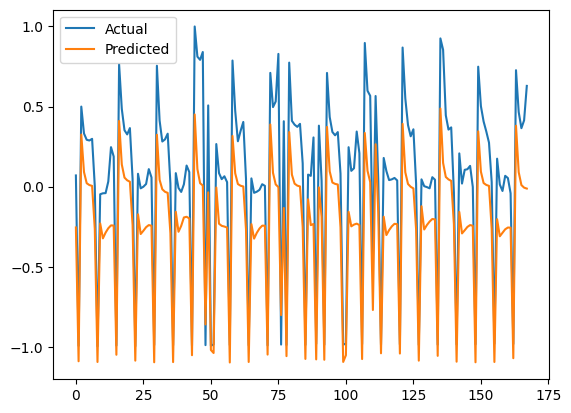

In [ ]:
# Evaluate the model
# loss, mae = model.evaluate(X_test, y_test)
# print(f"Mean Absolute Error on Test Set: {mae}")

# Make predictions
y_pred = model.predict(X_test)

# Reshape y_test for comparison
y_test_flat = y_test.flatten()

# Optionally, you can plot actual vs predicted values
import matplotlib.pyplot as plt

plt.plot(y_test_flat, label='Actual')
plt.plot(y_pred.flatten(), label='Predicted')
plt.legend()
plt.show()

In [ ]:
import numpy as np

def bootstrap_predictions(model, X, n_iterations=500):
    predictions = []
    for _ in range(n_iterations):
        # Sample with replacement
        X_sample = X[np.random.choice(X.shape[0], size=X.shape[0], replace=True)]
        preds = model.predict(X_sample)
        predictions.append(preds)
    return np.array(predictions)

# Get predictions for the test set
predictions = bootstrap_predictions(model, X_test)

# Calculate mean and confidence intervals
mean_preds = predictions.mean(axis=0)
conf_interval_lower = np.percentile(predictions, 2.5, axis=0)
conf_interval_upper = np.percentile(predictions, 97.5, axis=0)

# Create a DataFrame for better visualization
confidence_intervals = pd.DataFrame({
    'Mean Prediction': mean_preds.flatten(),
    'Lower CI': conf_interval_lower.flatten(),
    'Upper CI': conf_interval_upper.flatten()
})

print(confidence_intervals)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6/6 ━━━━━━━━

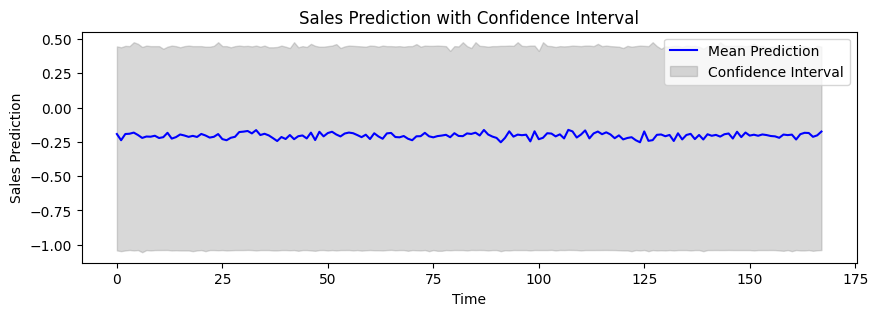

In [ ]:
import matplotlib.pyplot as plt

# Plot Mean Prediction and Confidence Intervals
plt.figure(figsize=(10, 3))

# Plot mean prediction
plt.plot(confidence_intervals.index, confidence_intervals['Mean Prediction'], label='Mean Prediction', color='blue')

# Fill between lower and upper confidence intervals
plt.fill_between(confidence_intervals.index,
                 confidence_intervals['Lower CI'],
                 confidence_intervals['Upper CI'],
                 color='gray', alpha=0.3, label='Confidence Interval')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Sales Prediction')
plt.title('Sales Prediction with Confidence Interval')
plt.legend()

# Show plot
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  0%|          | 0/168 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
692/692 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
692/692 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
692/692 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
692/692 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
693/693 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
693/693 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
693/693 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
692/692 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
690/690 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
690/690 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
690/690 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
690/690 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

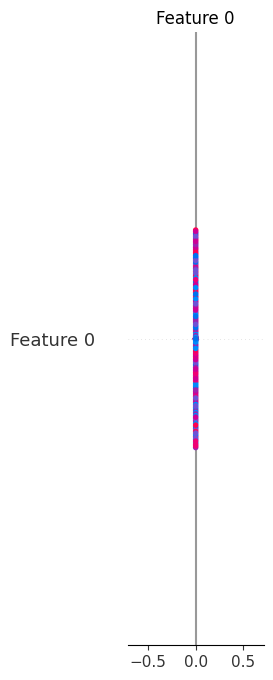

In [ ]:
import shap
import numpy as np

# Define a wrapper function that reshapes the input data for SHAP
def lstm_predict(X):
    X_reshaped = X.reshape((X.shape[0], n_steps_in, n_features))
    return model.predict(X_reshaped)

# Choose a sample of your training data to use for SHAP explanations
X_sample = X_train[:10]  # Take a sample for SHAP computation to avoid high computation costs

# Initialize the SHAP KernelExplainer
explainer = shap.KernelExplainer(lstm_predict, X_sample.reshape(X_sample.shape[0], -1))  # Flatten the data

# Compute SHAP values (this can take some time)
shap_values = explainer.shap_values(X_test.reshape(X_test.shape[0], -1))

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test.reshape(X_test.shape[0], -1))


In [ ]:
import shap

# Create a SHAP explainer for your model
explainer = shap.KernelExplainer(lstm_predict, X_train)
shap_values = explainer.shap_values(X_test)

# Plot SHAP values for the first prediction
shap.summary_plot(shap_values, X_test)


In [ ]:
import time

# Get current timestamp
timestamp = time.strftime("%Y-%m-%d-%H-%M-%S")

# Save the model with the timestamp
#model.save(f'lstm_model_{timestamp}.h5')

model.save(f'/lstm_model_{timestamp}.keras')

**Multi step**

In [ ]:
n_steps_in, n_steps_out = 21, 6
# convert into input/output
X_train, y_train = split_sequences(train_dataset, n_steps_in, n_steps_out)
X_test, y_test = split_sequences(test_dataset, n_steps_in, n_steps_out)

In [ ]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 6
n_seq = 1

X_train = X_train.reshape((X_train.shape[0], n_seq,1, n_steps_in, n_features))
X_test = X_test.reshape((X_test.shape[0], n_seq,1, n_steps_in, n_features))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

# Reshape the data to match the input for LSTM layers
# Instead of (samples, n_seq, 1, n_steps_in, n_features), LSTM expects (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], n_steps_in, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps_in, n_features))

# define the LSTM model
model = Sequential()
model.add(LSTM(units=256, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(Dropout(0.01))
model.add(Dense(n_steps_out))  # Output layer
model.compile(optimizer='adam', loss='huber')
model.summary()

# fit network
import keras
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Fit model with training data
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, verbose=1, shuffle=False, callbacks=[stop_early])

# Make predictions using the test data
test_predict = model.predict(X_test)

# Evaluate the model using performance metrics
import math
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

mae = mean_absolute_error(y_test, test_predict)
mse = mean_squared_error(y_test, test_predict)
r2 = r2_score(y_test, test_predict)
rmse = math.sqrt(mse)

# Print results
print("The model performance for test set:")
print('-' * 38)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')
print(f'RMSE: {rmse}')


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                       │ (None, 256)                 │         269,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 270,854 (1.03 MB)

 Trainable params: 270,854 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0863 - val_loss: 0.0770
Epoch 2/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0688 - val_loss: 0.0606
Epoch 3/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0607 - val_loss: 0.0567
Epoch 4/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 0.0595 - val_loss: 0.0577
Epoch 5/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0533 - val_loss: 0.0527
Epoch 6/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.0509 - val_loss: 0.0499
Epoch 7/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0479 - val_loss: 0.0465
Epoch 8/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0448 - val_loss: 0.0444
Epoch 9/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0413 - val_loss: 0.0413
Epoch 10/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0382 - val_loss: 0.0390
Epoch 11/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0346 - val_loss: 0.0394
Epoch 12/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/s

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


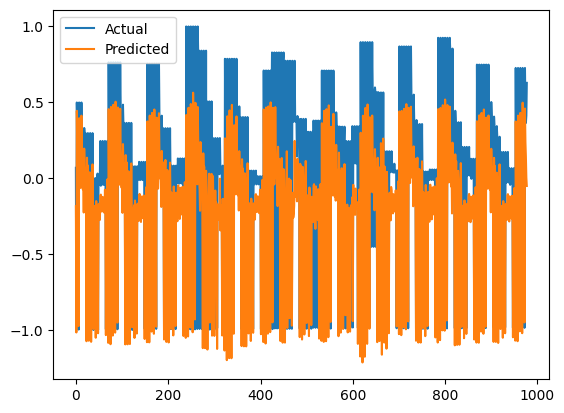

In [ ]:
# Evaluate the model
# loss, mae = model.evaluate(X_test, y_test)
# print(f"Mean Absolute Error on Test Set: {mae}")

# Make predictions
y_pred = model.predict(X_test)

# Reshape y_test for comparison
y_test_flat = y_test.flatten()

# Optionally, you can plot actual vs predicted values
import matplotlib.pyplot as plt

plt.plot(y_test_flat, label='Actual')
plt.plot(y_pred.flatten(), label='Predicted')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test[:21])
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[-0.18268467, -1.0129796 ,  0.44508705,  0.1679599 ,  0.0653514 ,
        -0.05048153],
       [-0.9707254 ,  0.39634296,  0.17924307,  0.08764024, -0.06210446,
         0.03102132],
       [ 0.41346216,  0.16646725,  0.10501199, -0.07102638,  0.03196929,
        -0.22386403],
       [ 0.19641873,  0.07527917,  0.00447539,  0.0696004 , -0.2170529 ,
        -1.0706123 ],
       [ 0.13669199, -0.02139129,  0.08536883, -0.19091387, -1.0674969 ,
        -0.17383532],
       [ 0.0405463 , -0.01673191, -0.10169887, -1.0745065 , -0.21097237,
        -0.19130805],
       [ 0.09290666, -0.171844  , -0.99001086, -0.18559746, -0.20254038,
        -0.20516631],
       [-0.1790462 , -1.0477457 , -0.14867002, -0.18964714, -0.25874665,
        -0.24854647],
       [-1.0182325 , -0.17354167, -0.16661482, -0.23313963, -0.27243817,
        -0.11328299],
       [-0.10595911, -0.21660534, -0.20527841, -0.21618378, -0.12096988,
        -0.21355338],
       [-0.2093955 , -0.22381076, -0.22082461, -0.

In [ ]:
# Make predictions using the test data
y_pred = model.predict(X_test)  # y_pred should have shape (num_samples, n_steps_out)

# Reshape or slice y_pred if necessary
# Since we are predicting multiple steps ahead, you need to select the prediction for the specific step
y_pred = y_pred.reshape(-1, n_steps_out)  # Ensure y_pred has shape (num_samples, n_steps_out)

# If you only need the last predicted value for concatenation:
last_y_pred = y_pred[-1]  # This takes the last predicted output (shape should be (n_steps_out,))


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [ ]:
# Assuming y_pred has shape (num_samples, n_steps_out) and is one-dimensional
# For example, if n_steps_out = 6 and there are 7 total features:
n_total_features = 7
y_pred = y_pred.reshape(-1, n_steps_out)  # Reshape if necessary

# Create a new array of zeros with the shape (num_samples, n_total_features)
predictions_with_features = np.zeros((y_pred.shape[0], n_total_features))

# Fill the last column with the predictions
# predictions_with_features[:, -1] = y_pred.flatten()  # Assuming predictions are in the last column
# Now you can inverse transform the predictions
y_pred_rescaled = scaler.inverse_transform(predictions_with_features)


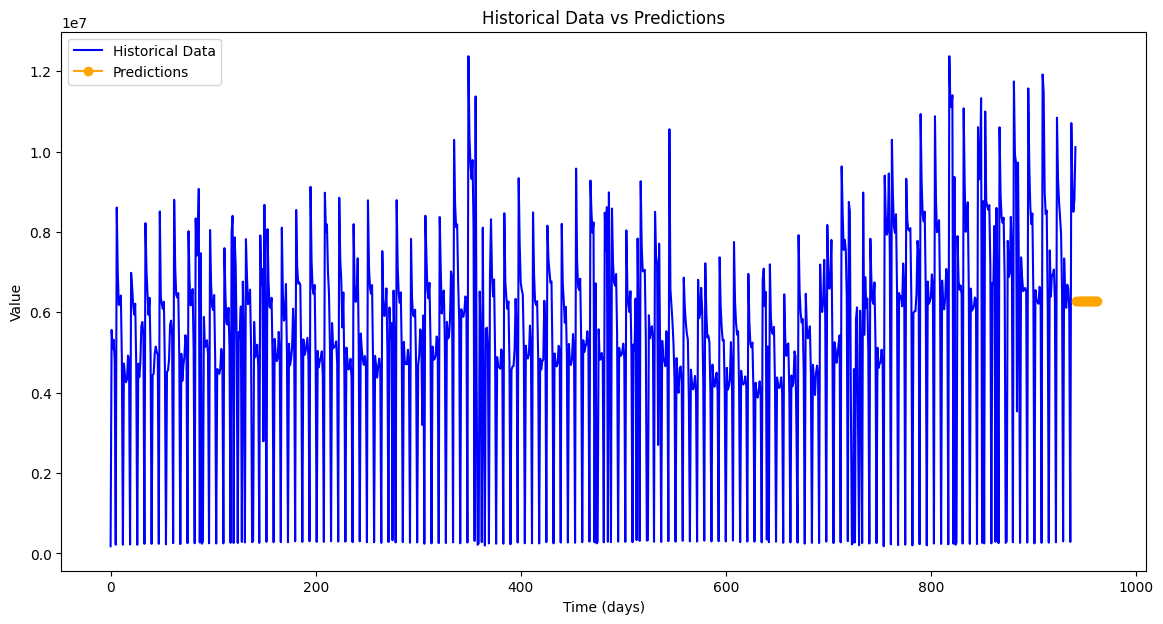

In [ ]:
import matplotlib.pyplot as plt

# Prepare historical data for the feature you want to compare
historical_data = scaler.inverse_transform(np.concatenate((train_data, test_data), axis=0))
dates = np.arange(len(historical_data))  # Replace with actual date indices if needed

# Create an array of dates for the predictions
prediction_dates = np.arange(len(historical_data), len(historical_data) + y_pred_rescaled.shape[0])

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(dates, historical_data[:, -1], label='Historical Data', color='blue')  # Adjust based on your target variable column
plt.plot(prediction_dates, y_pred_rescaled[:, -1], label='Predictions', color='orange', marker='o')  # Adjust as needed
plt.xlabel('Time (days)')
plt.ylabel('Value')
plt.title('Historical Data vs Predictions')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Create dates for the historical data
historical_dates = data_train.index[-n_steps_in:]  # Last n_steps_in dates from training data
historical_dates = pd.date_range(start=historical_dates[-1], periods=len(y_train), freq='D')

# Create dates for the predictions
future_dates = pd.date_range(start=historical_dates[-1], periods=len(y_pred_rescaled) + 1, freq='D')[1:]

# Plotting
plt.figure(figsize=(14, 7))

# Plot historical data
plt.plot(data_train.index, scaler.inverse_transform(data_train), label='Historical Data', color='blue')

# Plot predictions
plt.plot(future_dates, y_pred_rescaled, label='Predicted 6 Steps Ahead', color='red', linestyle='--')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Historical Sales vs Predicted Sales (6 Steps Ahead)')
plt.axvline(x=historical_dates[-1], color='grey', linestyle='--')  # Vertical line to separate historical and predicted
plt.legend()
plt.grid()
plt.show()


In [ ]:
import time

# Get current timestamp
timestamp = time.strftime("%Y-%m-%d-%H-%M-%S")

# Save the model with the timestamp
#model.save(f'lstm_model6_{timestamp}.h5')

model.save(f'lstm_model6_{timestamp}.keras')

In [ ]:
import numpy as np

def bootstrap_predictions(model, X, n_iterations=500):
    predictions = []
    for _ in range(n_iterations):
        # Sample with replacement
        X_sample = X[np.random.choice(X.shape[0], size=X.shape[0], replace=True)]
        preds = model.predict(X_sample)
        predictions.append(preds)
    return np.array(predictions)

# Get predictions for the test set
predictions = bootstrap_predictions(model, X_test)

# Calculate mean and confidence intervals
mean_preds = predictions.mean(axis=0)
conf_interval_lower = np.percentile(predictions, 2.5, axis=0)
conf_interval_upper = np.percentile(predictions, 97.5, axis=0)

# Create a DataFrame for better visualization
confidence_intervals = pd.DataFrame({
    'Mean Prediction': mean_preds.flatten(),
    'Lower CI': conf_interval_lower.flatten(),
    'Upper CI': conf_interval_upper.flatten()
})

print(confidence_intervals)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━

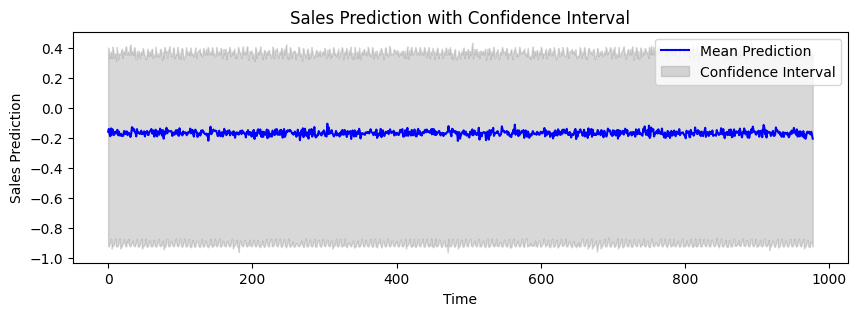

In [ ]:
import matplotlib.pyplot as plt

# Plot Mean Prediction and Confidence Intervals
plt.figure(figsize=(10, 3))

# Plot mean prediction
plt.plot(confidence_intervals.index, confidence_intervals['Mean Prediction'], label='Mean Prediction', color='blue')

# Fill between lower and upper confidence intervals
plt.fill_between(confidence_intervals.index,
                 confidence_intervals['Lower CI'],
                 confidence_intervals['Upper CI'],
                 color='gray', alpha=0.3, label='Confidence Interval')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Sales Prediction')
plt.title('Sales Prediction with Confidence Interval')
plt.legend()

# Show plot
plt.show()


* The Multivariate LSTM single-step model shows a strong balance between simplicity and predictive power, with a high R² (0.75) and low error metrics, making it a solid choice for short-term sales forecasting.

* The Multivariate multi-step LSTM model offers good long-term forecasting capabilities, but with slightly higher errors than the single-step model.

* The Random Forest model stands out with the highest R² (0.95), indicating it captures almost all the variability in the sales data. However, its higher RMSE and MAE indicate it may be less accurate at granular levels than the LSTM models.
